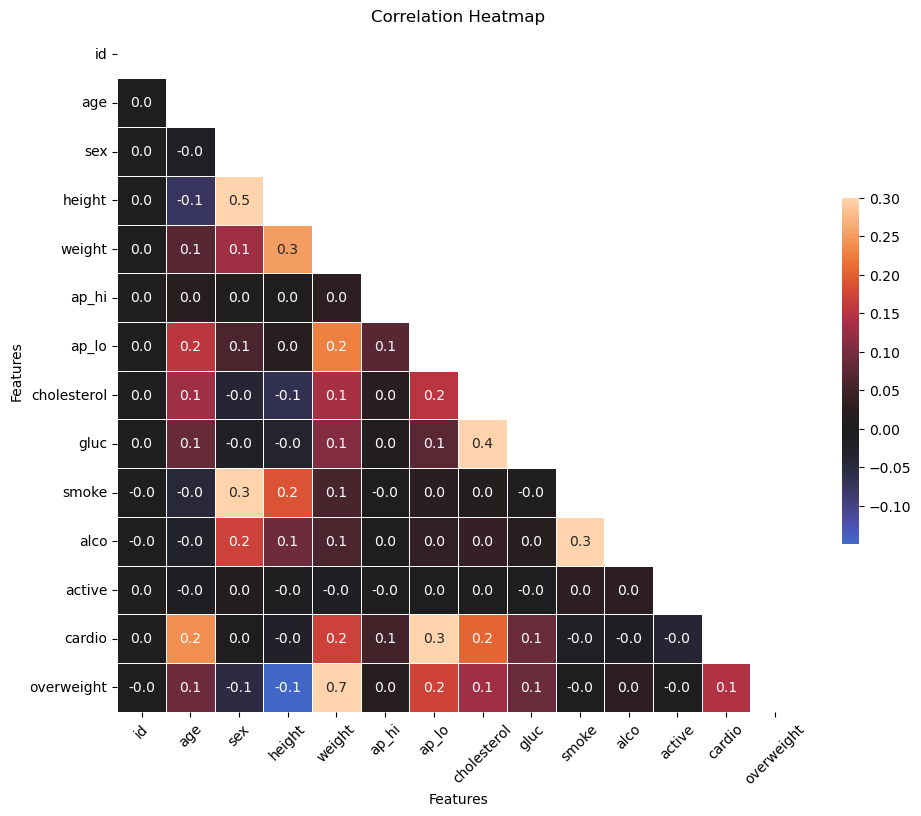

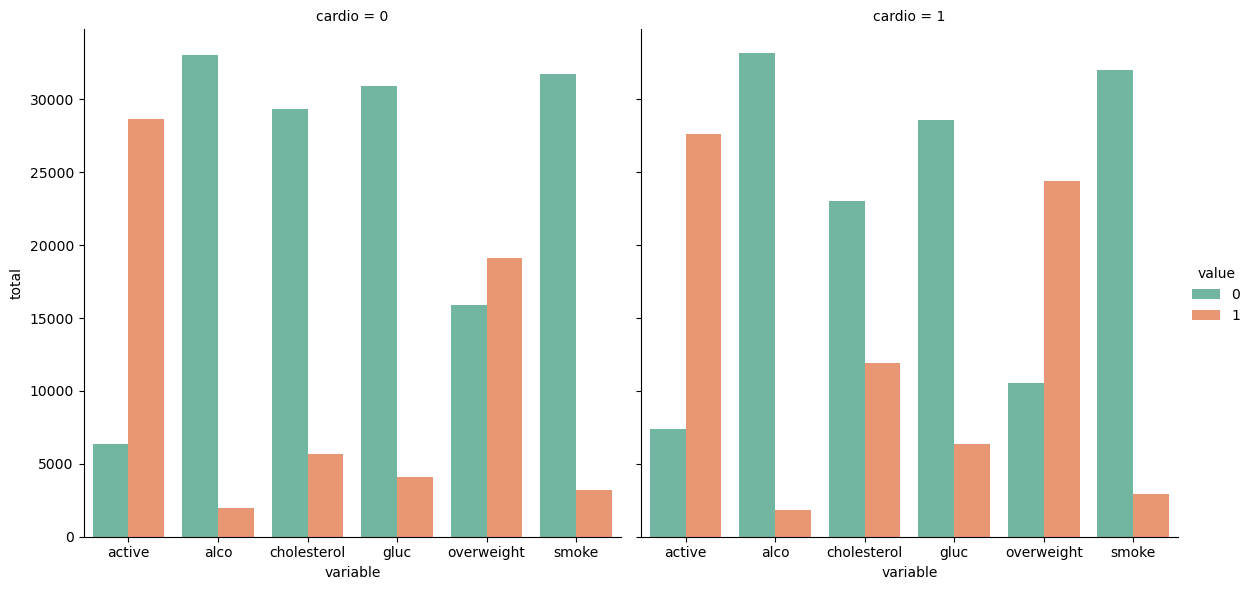

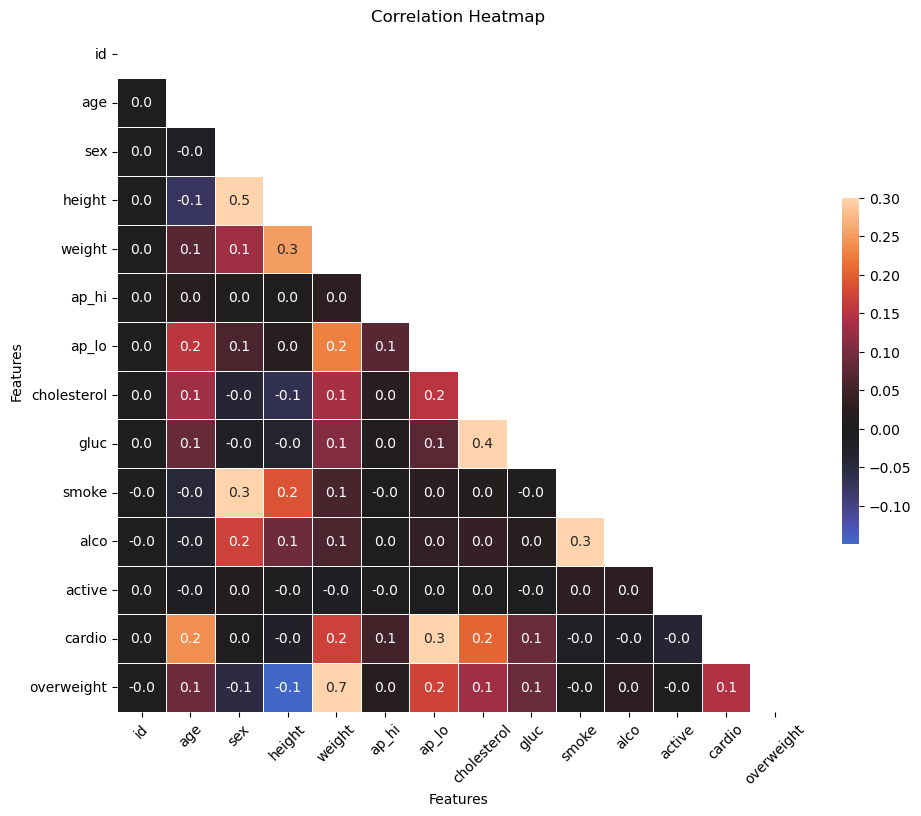

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])



    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar',height=6, aspect=1, palette='Set2')



    # Get the figure for the output
    fig = g.figure


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'

    sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

    # Set title for the heatmap
    ax.set_title('Correlation Heatmap')

    # Set labels for x and y axes
    ax.set_xlabel('Features')
    ax.set_ylabel('Features')

    # Rotate the tick labels on the x and y axes for better readability
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


draw_cat_plot()
draw_heat_map()